<h5>Model Comparison</h5>

<h4>Step-1: Import Necessary Dependencies</h4>

In [5]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
!pip3 install wordcloud

<h4>Step-2: Read and Load the Dataset</h4>

In [7]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('project_data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
476833,0,2178000246,Mon Jun 15 07:02:36 PDT 2009,NO_QUERY,nikolahassan,@jauipop but what abt boost juice? U'll be dep...
929463,4,1760004142,Sun May 10 20:26:33 PDT 2009,NO_QUERY,gail666,"@TPO_Hisself I love your posts, fake or true, ..."
1157803,4,1979214419,Sun May 31 02:05:44 PDT 2009,NO_QUERY,wizard79,@alivicwil thanks for the ideas. Just had dinn...
1085341,4,1969154116,Fri May 29 23:10:35 PDT 2009,NO_QUERY,ClassicSydney,@Kevinldrasta I'm Goin To Some Place In Manhat...
34402,0,1564799577,Mon Apr 20 04:58:12 PDT 2009,NO_QUERY,supergirl_16,@Poynter_sex Dougie:No cookies? *Starts crying*


<h4>Step-3: Exploratory Data Analysis </h4>

<h5>3.1: Five top records of data</h5>

In [8]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<h5>3.2: Columns/features in data</h5>

In [10]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

<h5>3.3: Length of the dataset</h5>

In [11]:
print('length of data is', len(df))

length of data is 1600000


<h5>3.4: Shape of data</h5>

In [12]:
df.shape

(1600000, 6)

<h5>3.5: Data information</h5>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


<h5>3.6: Datatypes of all columns</h5>

In [6]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

<h5>3.7: Checking for Null values</h5>

In [14]:
np.sum(df.isnull().any(axis=1))

0

<h5>3.8: Rows and columns in the dataset</h5>

In [19]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


<h5>3.9: Check unique Target Values</h5>

In [20]:
df['target'].unique()

array([0, 4], dtype=int64)

In [18]:
df.target.value_counts()


4    800000
0    800000
Name: target, dtype: int64

<h5>3.10: Updating target variable with 0 & 1</h5>

In [34]:
df.target = df.target.replace({0: 0, 4: 1})
df.target.value_counts()

1    800000
0    800000
Name: target, dtype: int64

<h5>3.11: Check the number of target values</h5>

In [35]:
df['target'].nunique()

2

<h4>Step-4: Data Visualization of Target Variables</h4>

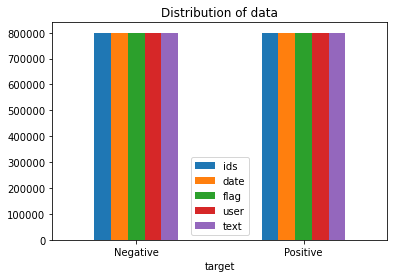

In [50]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend= True)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

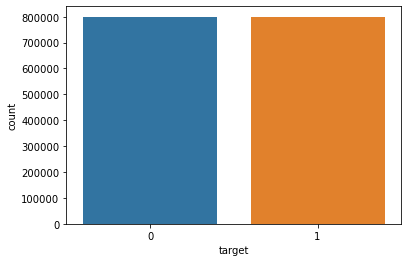

In [37]:
import seaborn as sns
sns.countplot(x='target', data=df)

<h4>Step-5: Data Preprocessing </h4>

<h5>5.1: Selecting the text and Target column for our further analysis</h5>

In [38]:
data=df[['text','target']]

<h5>5.2: Print unique values of target variables</h5>

In [39]:
data['target'].unique()

array([0, 1], dtype=int64)

<h5>5.3: Separating positive and negative tweets</h5>

In [42]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]     

<h5>5.4: Taking one fourth data so we can run on our machine easily</h5>

In [43]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]      

<h5>5.5: Combining positive and negative tweets</h5>

In [44]:
dataset = pd.concat([data_pos, data_neg])     

<h5>5.6: Making statement text in lower case</h5>

In [51]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off weekend, work trip malmï¿½ f...
19996                                     one day holidays
19997                   feeling right .. hate damn humprey
19998    geez,i hv read whole book personality types em...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

<h5>5.7: Defining set containing all stopwords in English.</h5>

In [52]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

<h5>5.9: Cleaning and removing the above stop words list from the tweet text</h5>

In [53]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()                                                                      

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

<h5>5.10: Cleaning and removing punctuations</h5>

In [54]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()                                                               

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

<h5>5.11: Cleaning and removing repeating characters</h5>

In [55]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()                                                            

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

<h5>5.12: Cleaning and removing URL’s</h5>

In [56]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()                                                             

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

<h5>5.13: Cleaning and removing Numeric numbers</h5>

In [57]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()                                                         

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

<h5>5.14: Getting tokenization of tweet text</h5>

In [58]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()                                              

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

<h5>5.15: Applying Stemming</h5>

In [59]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()                                                              

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

<h5>5.16: Applying Lemmatizer</h5>

In [60]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()                                                                

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

<h5>5.17: Separating input feature and label</h5>

In [61]:
X=data.text
y=data.target

<h5>5.18: Plot a cloud of words for negative tweets</h5>

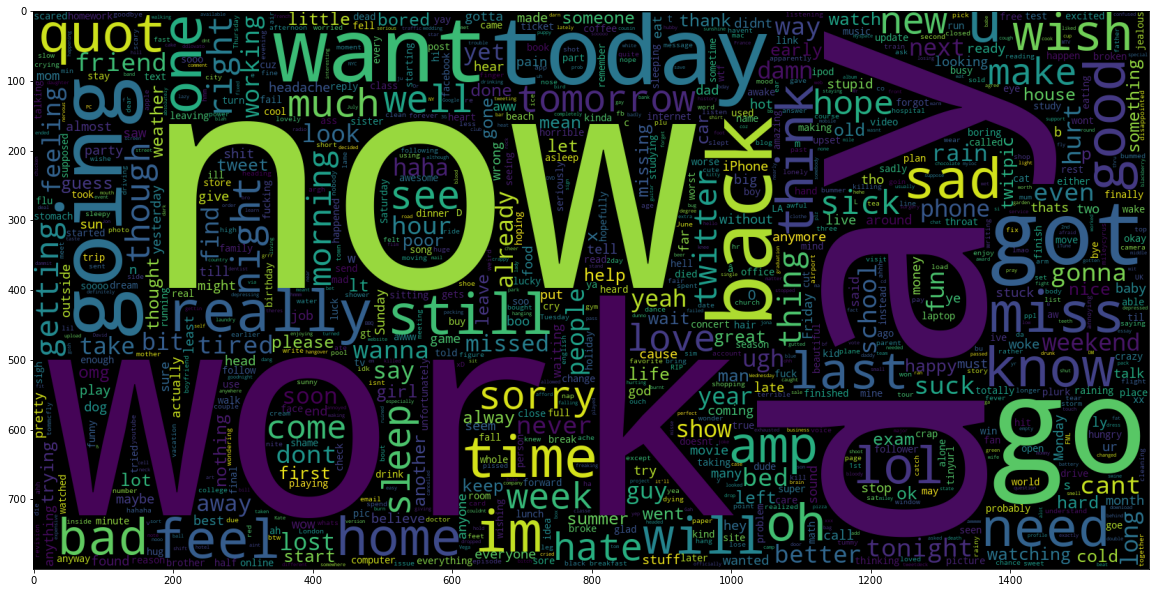

In [62]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)                                                                  

<h4>Step-6: Splitting our data into Train and Test Subset</h4>

In [63]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)                               

<h4>Step-7: Transforming Dataset using TF-IDF Vectorizer</h4>

<h5>7.1: Fit the TF-IDF Vectorizer</h5>

In [64]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))   

No. of feature_words:  500000


<h5>7.2: Transform the data using TF-IDF Vectorizer</h5>

In [65]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)            

<h4>Step-8: Function For Model Evaluation</h4>

In [68]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)                                                       

<h4>Step-9: Model Building</h4>

<h5>8.1: Model-1 Bernoulli Naive Bayes</h5>

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



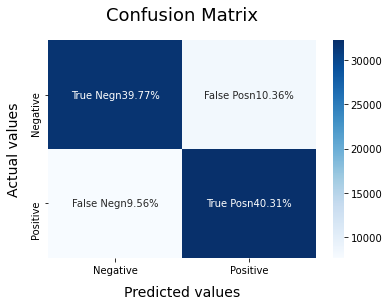

In [76]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)                                              

<h5>8.2: Plot the ROC-AUC Curve for model-1 </h5>

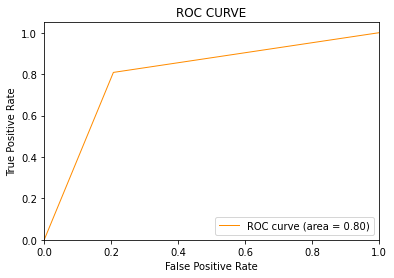

In [77]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()      

<h5>8.3: Model-2: SVM(Support Vector Machine)</h5>

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



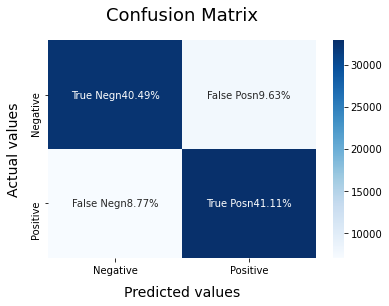

In [78]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)                                   

<h5>8.4: Plot the ROC-AUC Curve for model-2</h5>

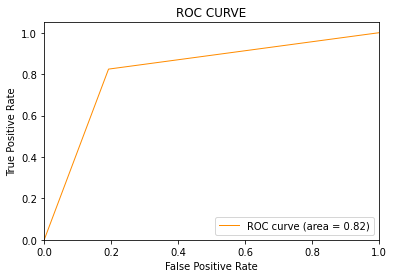

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<h5>8.5: Model-3 Logistic Regression</h5>

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



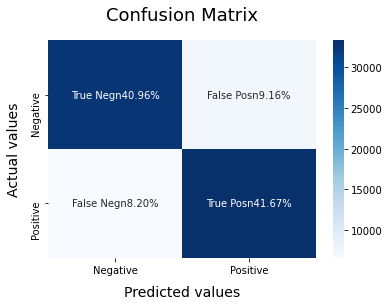

In [80]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)                                                  

<h5>8.6: Plot the ROC-AUC Curve for model-3</h5>

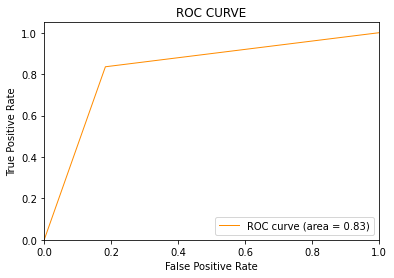

In [81]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()